In [1]:
# import packages
import sys
import csv
import tweepy
import matplotlib.pyplot as plt

from collections import Counter
from aylienapiclient import textapi

In [2]:
# in case running code on python2.7 and lower
if sys.version_info[0] < 3:
    input = raw_input

In [3]:
# Twitter credintials
consumer_key = "sRPC4AzVXZ7dPYG9Jf2SAWcj4"
consumer_secret = "A2qhpn5REn8broeDRW3CbgQ7aeecJ71wFuukJRmbgVrD9urVT8"
access_token = "3032895760-IsNnchFNj0DhATTkWrXssLhKiwVlT7FGv90lCwu"
access_token_secret = "g5pagQ3xl1QisrXxORIoSJltgvseO70yBc1d54uTKjLya"

In [4]:
# AYLIEN credintials
app_id = "af0efd19"
app_key = "0134a3b117b5759d2272e9d574cea60f"

In [5]:
# initialise instance of Tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [6]:
# initialise instance of AYLIEN
client = textapi.Client(app_id, app_key)

In [7]:
# testing part
# input a query to test the code
query = input("Subject name to analyze:\n")

Subject name to analyze:
Mahatma Gandhi


In [8]:
# input number of tweets to analyze
number = input("Number of tweets to analyze?\n")

Number of tweets to analyze?
50


In [9]:
# build result search config
results = api.search(
    lang = "en",
    q = query + " -rt",
    count = number,
    result_type = "mixed" # changeable
)

print("--- Gathered Tweets \n")

--- Gathered Tweets 



In [10]:
# open a csv file to store the scraped tweets and their sentiment output
file_name = 'Sentiment_Analysis_of_{}_Tweets_About_{}.csv'.format(number, query)

In [11]:
with open(file_name, 'w', newline='') as csvfile:
    csv_writer = csv.DictWriter(
        f = csvfile,
        fieldnames = ["Tweet", "Sentiment", "Confidence"]
    )
    csv_writer.writeheader()
    
    print("--- Opened a CSV file to store the results of your analysis")
    
    # clean tweets and forward to AYLIEN Text API
    for c, result in enumerate(results, start=1):
        tweet = result.text
        tidy_tweet = tweet.strip().encode('ascii', 'ignore')

        if len(tweet) == 0:
            print("Empty Tweet")
            continue

        response = client.Sentiment({'text': tidy_tweet})
        csv_writer.writerow({
            'Tweet': response['text'],
            'Sentiment': response['polarity'],
            'Confidence': response['polarity_confidence']
        })

        print("Analyzed Tweet {}".format(c))

--- Opened a CSV file to store the results of your analysis
Analyzed Tweet 1
Analyzed Tweet 2
Analyzed Tweet 3
Analyzed Tweet 4
Analyzed Tweet 5
Analyzed Tweet 6
Analyzed Tweet 7
Analyzed Tweet 8
Analyzed Tweet 9
Analyzed Tweet 10
Analyzed Tweet 11
Analyzed Tweet 12
Analyzed Tweet 13
Analyzed Tweet 14
Analyzed Tweet 15
Analyzed Tweet 16
Analyzed Tweet 17
Analyzed Tweet 18
Analyzed Tweet 19
Analyzed Tweet 20
Analyzed Tweet 21
Analyzed Tweet 22
Analyzed Tweet 23
Analyzed Tweet 24
Analyzed Tweet 25
Analyzed Tweet 26
Analyzed Tweet 27
Analyzed Tweet 28
Analyzed Tweet 29
Analyzed Tweet 30
Analyzed Tweet 31
Analyzed Tweet 32
Analyzed Tweet 33
Analyzed Tweet 34
Analyzed Tweet 35
Analyzed Tweet 36
Analyzed Tweet 37
Analyzed Tweet 38
Analyzed Tweet 39
Analyzed Tweet 40
Analyzed Tweet 41
Analyzed Tweet 42
Analyzed Tweet 43
Analyzed Tweet 44
Analyzed Tweet 45
Analyzed Tweet 46
Analyzed Tweet 47
Analyzed Tweet 48
Analyzed Tweet 49
Analyzed Tweet 50


In [12]:
# count the data in the sentiment column of the CSV file
with open(file_name, 'r') as data:
    counter = Counter()
    
    for row in csv.DictReader(data):
        counter[row['Sentiment']] += 1
        
    positive = counter['positive']
    negative = counter['negative']
    neutral = counter['neutral']

In [13]:
# declare variables to display a pie chart of outcome sizes using counter variables
colors = ['green', 'red', 'grey']
sizes = [positive, negative, neutral]
labels = 'Positive', 'Negative', 'Neutral'

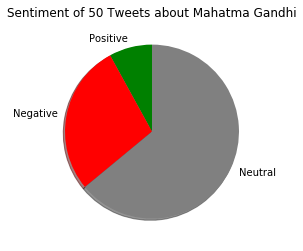

In [14]:
# use matplotlib to plot the chart
plt.pie(
    x = sizes,
    shadow = True,
    colors = colors,
    labels = labels,
    startangle = 90
)

plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()